## Проект по Boostrap

Студент: Анкушев Владислав

---
## Описание эксперимента

Перед вами таблица, где числовая переменная – непрерывная.  
**Задача** – сравнить группы двумя способами: бутстрапом и u-тестом

### Описание дата-сета 
- **value** – значения метрики
- **experimentVariant** – Вариант теста (Control – контроль, Treatment – тест)


### Задача

1. Сравните результат между тестом и контролем по двум кейсам:

    - примените бутстрап (с np.mean) и критерий mann-whitney, а потом сравните p-value
    - примените бутстрап (с np.median) и критерий mann-whitney, а потом сравните p-value


2. Напишите выводы, которые можно сделать на основе анализа примененных критериев

## Импортируем библиотеки!

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt
import random
from tqdm.auto import tqdm

import seaborn as sns

sns.set(rc={'figure.figsize':(10,8)})

## Используемые функции

Функция для визуализации графиков

In [2]:
#Напишем функцию
def graph (data1, data2, column):

#Функция для первых двух графиков
    if data1.columns[0] == 'value':
    #Создаем 2 рамки для графиков
        fig, axes = plt.subplots(1, 2, sharey = False)

        fig.set_size_inches(30, 8)

    #Первый график – Контрольная группа
        graph_1 = data1.hist(column, color = 'r', ax = axes[0])

    #Второй график – Экспериментальнаая группа
        graph_2 = data2.hist(column,  color = 'blue', ax = axes[1])

    #Общее название 
        fig.suptitle('Распределение Value по двум группам', fontsize=25)

    #Названия для отдельных графиков
        axes[0].set_title('Control группа')
        axes[1].set_title('Treatment группа')

    #Добавляем линии средних для двух графиков
        axes[0].axvline(x = data1[column].mean(),
                color='yellow')

        axes[1].axvline(x = data2[column].mean(),
                color='yellow')

    #Добавляем линии медианы для двух графиков
        axes[0].axvline(x = data1[column].median(),
                color = 'orange')

        axes[1].axvline(x = data2[column].median(),
                color = 'orange')

        
    #Добавляем легенды на график:

    #Среднее
        bbox_props = dict( boxstyle="round", fc="w", ec="0.5")

        axes[0].annotate(f"Mean = {round(data1[column].mean(),2)}", xy=(0.99, 0.95), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)

        axes[1].annotate(f"Mean = {round(data2[column].mean(),2)}", xy=(0.99, 0.95), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)

    #Медиана
        axes[0].annotate(f"Median = {round(data1[column].median(),2)}", xy=(0.99, 0.85), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)

        axes[1].annotate(f"Median = {round(data2[column].median(),2)}", xy=(0.99, 0.85), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)
 
    #-------------------------------------------------------------------------------------
    #Функция для графика с mean boostrap распределением 
    
    elif data1.columns[0] == 'mean':
    #Создаем 2 рамки для графиков
        fig, axes = plt.subplots(1, 2, sharey = False)

        fig.set_size_inches(30, 8)

    #Первый график – Контрольная группа
        graph_1 = data1.hist(column, color = 'r', ax = axes[0])

    #Второй график – Экспериментальнаая группа
        graph_2 = data2.hist(column,  color = 'blue', ax = axes[1])

    #Общее название 
        fig.suptitle('Boostrap-распределение средних по двум группам', fontsize=25)

    #Названия для отдельных графиков
        axes[0].set_title('Control группа')
        axes[1].set_title('Treatment группа')

    #Добавляем линии средних для двух графиков
        axes[0].axvline(x = data1[column].mean(),
                color='yellow')

        axes[1].axvline(x = data2[column].mean(),
                color='yellow')

    #Добавляем линни доверительных интервалов для двух графиков
        axes[0].vlines(ci_control,ymin=0,ymax=590,linestyle='--', color='black')
        
        axes[1].vlines(ci_treatment,ymin=0,ymax=590,linestyle='--', color='black')
        
        
        
    #Добавляем легенды на график: 
    
    #Средние
        bbox_props = dict( boxstyle="round", fc="w", ec="0.5")

        axes[0].annotate(f"Mean = {round(data1[column].mean(),2)}", xy=(0.99, 0.95), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)

        axes[1].annotate(f"Mean = {round(data2[column].mean(),2)}", xy=(0.99, 0.95), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)
        
    #Доверительные интервалы
        axes[0].annotate(f"CI = {round(ci_control,2)}", xy=(0.99, 0.80), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)

        axes[1].annotate(f"CI = {round(ci_treatment,2)}", xy=(0.99, 0.80), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props) 
        
    #------------------------------------------------------------------------------------
    #Функция для графика с median boostrap распределением 
    
    else:
        #Создаем 2 рамки для графиков
        fig, axes = plt.subplots(1, 2, sharey = False)

        fig.set_size_inches(30, 8)

    #Первый график – Контрольная группа
        graph_1 = data1.hist(column, color = 'r', ax = axes[0])

    #Второй график – Экспериментальнаая группа
        graph_2 = data2.hist(column,  color = 'blue', ax = axes[1])

    #Общее название 
        fig.suptitle('Boostrap-распределение медиан по двум группам', fontsize=25)

    #Названия для отдельных графиков
        axes[0].set_title('Control группа')
        axes[1].set_title('Treatment группа')

    #Добавляем линии медианы для двух графиков
        axes[0].axvline(x = data1[column].median(),
                color = 'orange')

        axes[1].axvline(x = data2[column].median(),
                color = 'orange')
        
    #Добавляем линни доверительных интервалов для двух графиков
        axes[0].vlines(ci_control_median,ymin=0,ymax=590,linestyle='--', color='black')
        
        axes[1].vlines(ci_treatment_median,ymin=0,ymax=590,linestyle='--', color='black')   
        
        
        bbox_props = dict( boxstyle="round", fc="w", ec="0.5")
        
        
    #Добавляем легенды на график:
        
        #Медианы
        axes[0].annotate(f"Median = {round(data1[column].median(),2)}", xy=(0.99, 0.95), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)

        axes[1].annotate(f"Median = {round(data2[column].median(),2)}", xy=(0.99, 0.95), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)
        
        #Доверительные интервалы
        axes[0].annotate(f"CI = {round(ci_control_median,2)}", xy=(0.99, 0.80), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)

        axes[1].annotate(f"CI = {round(ci_treatment_median,2)}", xy=(0.99, 0.80), 
                        xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', bbox=bbox_props)   
        
    return axes[0], axes[1]

---
## Скачиваем данные и исправляем тип данных

In [3]:
data = pd.read_csv('/home/jupyter-v-ankushev-18/Statistics/hw_bootstrap.csv', sep = ';')

#### Удаляем лишнюю колонку с индексами

In [4]:
#Удаляем
data_new = data.drop(columns=['Unnamed: 0'])

#### Меняем тип для колонки value
Данная колонка обладает типом object и еще имеет запятые.  

Поэтому:
1. Меняем тип на str
2. Меняем запятую на точки
3. Меняем на float

In [5]:
#Меняем тип для колонки value
data_new['value'] = data_new['value'].astype(str).str.replace(',','.').astype(float)

---
## Посмотрим на распределения (перед boostrap)

In [6]:
#Разделит дата-сет на две группы:
data_new_control = data_new.query('experimentVariant == "Control"')
data_new_treatment = data_new.query('experimentVariant == "Treatment"')

(<AxesSubplot:title={'center':'Control группа'}>,
 <AxesSubplot:title={'center':'Treatment группа'}>)

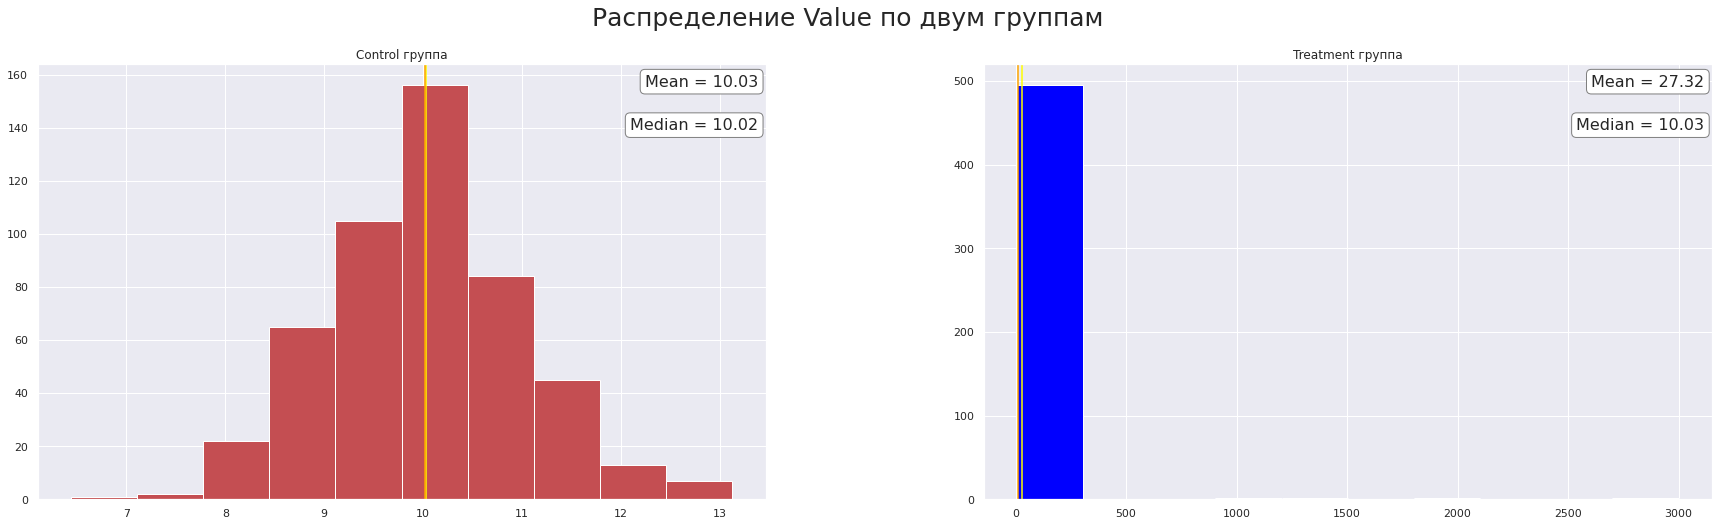

In [7]:
#Используем функцию для визуализации
graph(data_new_control, data_new_treatment, 'value')

**Вывод по графикам**:
1. Распределение value для контрольной группы имеет нормальную форму (визуально + значения статистик примерно одинаковые)
2. Распределение value для экспериментальной группы скошенно, возможно из-за выбросов 

### Посмотрим выбросы в экспериментальной группе!

In [8]:
data_new_treatment.query('value > 500')

,value,experimentVariant
995,1000.0,Treatment
996,1200.0,Treatment
997,1500.0,Treatment
998,2000.0,Treatment
999,3000.0,Treatment


### Что будет, если выбросов нет?

In [9]:
#Создадим новый дата-сет
data_new_treatment_no = data_new_treatment.query('value < 500')

### Опять нарисуем тот же график 

(<AxesSubplot:title={'center':'Control группа'}>,
 <AxesSubplot:title={'center':'Treatment группа'}>)

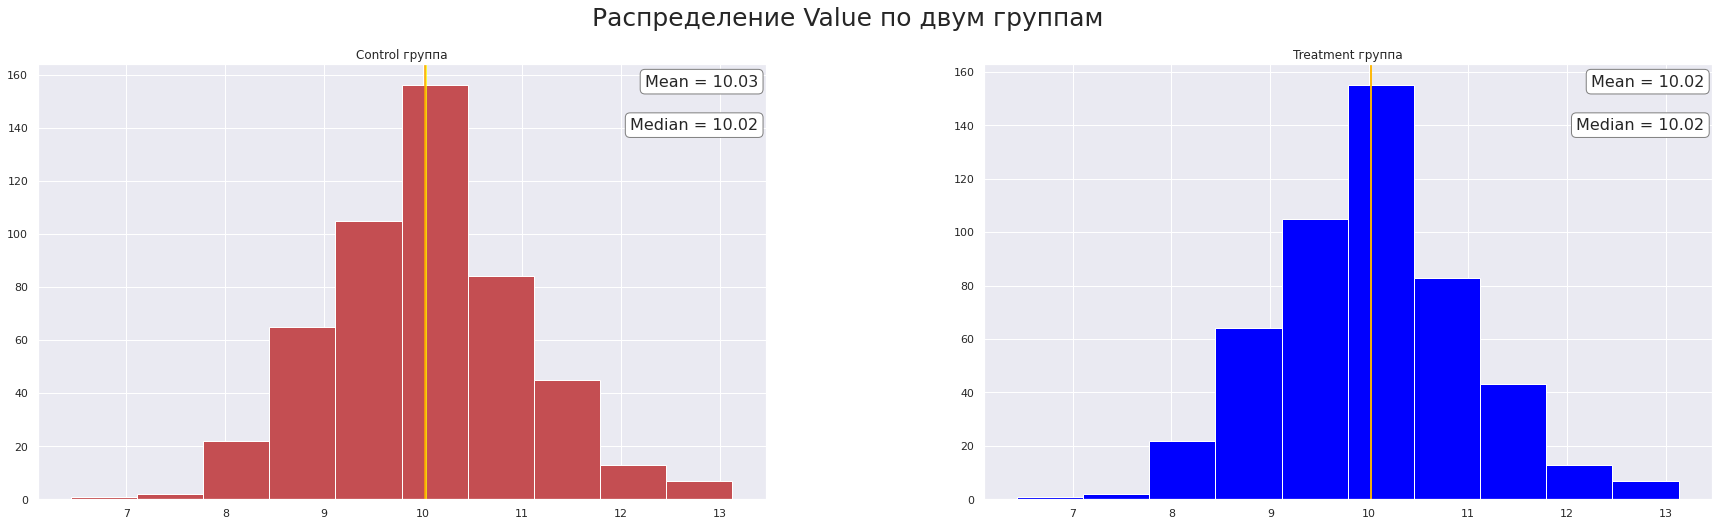

In [10]:
#Используем функцию для визуализации
graph(data_new_control, data_new_treatment_no, 'value')

**Интерпретация**:
1. Мы получили практически идентичные графики !  
2. Выбросы для экспериментальной группы могут повысить ошибку первого рода.
3. Но их мало, и по сути ожидается, что мы примем H0 при u-тесте 

---
## Перейдем к boostrap для средних

Отдельно посмотрим на средние boostrap и оригинальной выборки

**Экспериментальная выборка**

In [12]:
#Параметры 
boot_it = 2000
boot_conf_level = 0.95

#Считаем бустреп среднее
treatment_boot = []
for i in range(boot_it):
    samples = data_new_treatment.value.sample(len(data_new_treatment.value), replace = True)
    treatment_boot.append(np.mean(samples))

print(f'Оригинальная выборка: {round(np.mean(data_new_treatment.value),2)}, Бустреп выборка: {round(np.mean(treatment_boot),2)}')

Оригинальная выборка: 27.32, Бустреп выборка: 27.29


**Контрольная выборка**

In [13]:
#Параметры 
boot_it = 2000
boot_conf_level = 0.95

#Считаем бустреп среднее
control_boot = []
for i in range(boot_it):
    samples = data_new_control.value.sample(len(data_new_control.value), replace = True)
    control_boot.append(np.mean(samples))

print(f'Оригинальная выборка: {round(np.mean(data_new_control.value),2)}, Бустреп выборка: {round(np.mean(control_boot),2)}')

Оригинальная выборка: 10.03, Бустреп выборка: 10.03


---
Отдельно посмотрим на **boostrap доверительные интервалы среднего**

**Экспериментальная выборка**

In [14]:
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci_control = pd.Series(control_boot).quantile([left_ci, right_ci])
print(ci_control)

0.025     9.940055
0.975    10.109561
dtype: float64


**Контрольная выборка**

In [15]:
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci_treatment = pd.Series(treatment_boot).quantile([left_ci, right_ci])
print(ci_treatment)

0.025    13.890775
0.975    45.640954
dtype: float64


---
### Теперь давайте проведем визуализацию boostrap выборок и оригинальных выборок по среднему

In [16]:
#Создадим списки как дата-фреймы (чтобы функция для визуализации работала)
control_boot = pd.DataFrame({"mean" : control_boot})
treatment_boot = pd.DataFrame({"mean" : treatment_boot})

(<AxesSubplot:title={'center':'Control группа'}>,
 <AxesSubplot:title={'center':'Treatment группа'}>)

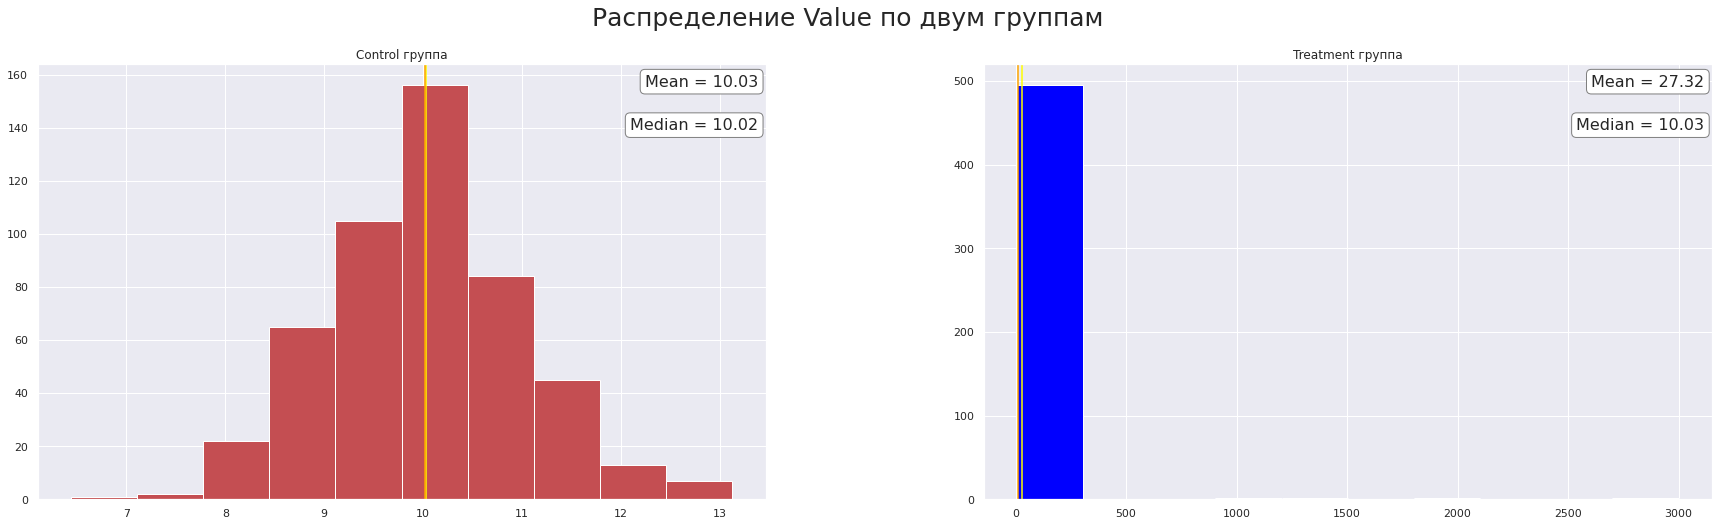

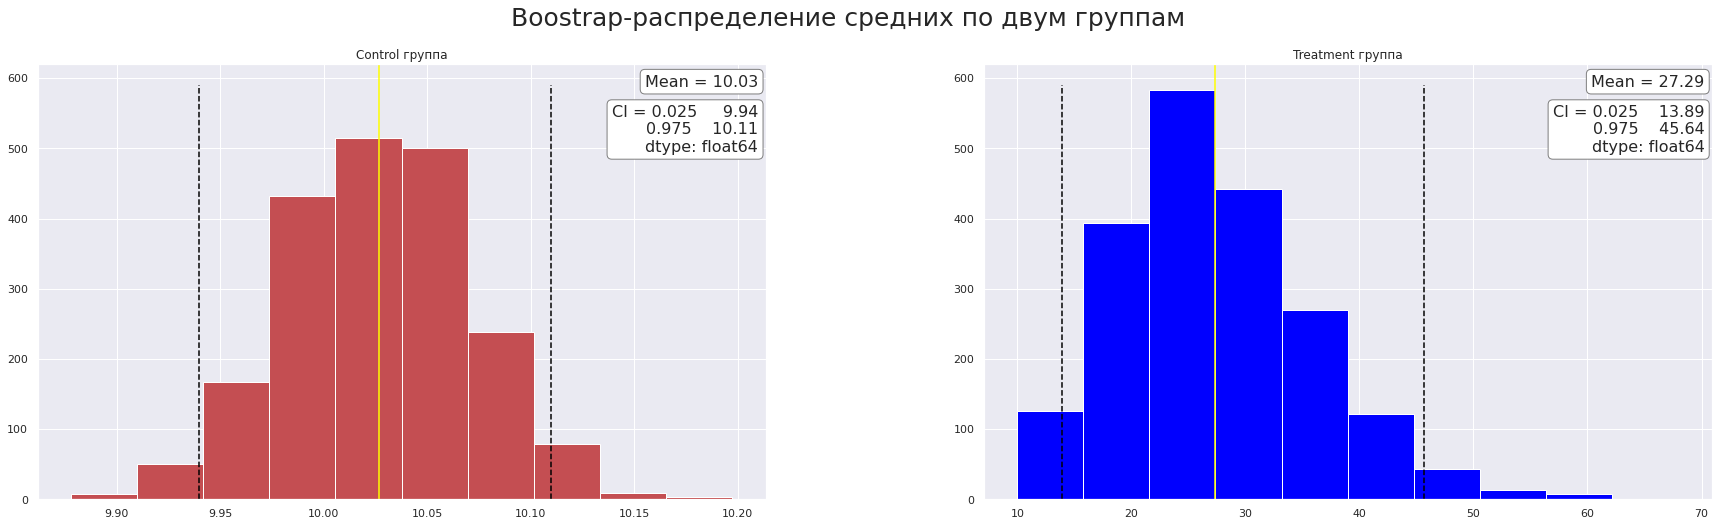

In [17]:
#Используем функцию для визуализации
graph(data_new_control, data_new_treatment, 'value')
graph(control_boot, treatment_boot, 'mean')

**Интерпретация**:
1. Для контрольной выборки boostrap хорошо сработал. 
   - Boostrap среднее = среднее Оригинальной выборки
   - Доверительные интервалы небольшие 
   
   
2. Для экспериментальной группы boostrap хуже сработал, так как доверительный интервал имеет высокую стандартную ошибку, из-за выбросов 

---
## Перейдем к boostrap для медианы

Отдельно посмотрим на медианы boostrap и оригинальной выборки

**Экспериментальная выборка**

In [18]:
#Параметры 
boot_it = 2000
boot_conf_level = 0.95

#Считаем бустреп медиану
treatment_boot_median = []
for i in range(boot_it):
    samples = data_new_treatment.value.sample(len(data_new_treatment.value), replace = True)
    treatment_boot_median.append(np.median(samples))

print(f'Оригинальная выборка: {round(np.median(data_new_treatment.value),2)}, Бустреп выборка: {round(np.median(treatment_boot_median),2)}')

Оригинальная выборка: 10.03, Бустреп выборка: 10.03


**Контрольная выборка**

In [19]:
#Параметры 
boot_it = 2000
boot_conf_level = 0.95

#Считаем бустреп медиану
control_boot_median = []
for i in range(boot_it):
    samples = data_new_control.value.sample(len(data_new_control.value), replace = True)
    control_boot_median.append(np.median(samples))

print(f'Оригинальная выборка: {round(np.median(data_new_control.value),2)}, Бустреп выборка: {round(np.median(control_boot_median),2)}')

Оригинальная выборка: 10.02, Бустреп выборка: 10.02


---
Отдельно посмотрим на **boostrap доверительные интервалы медианы**

**Экспериментальная выборка**

In [20]:
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci_control_median = pd.Series(control_boot_median).quantile([left_ci, right_ci])
print(ci_control_median)

0.025     9.925009
0.975    10.115262
dtype: float64


**Контрольная выборка**

In [21]:
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci_treatment_median = pd.Series(treatment_boot_median).quantile([left_ci, right_ci])
print(ci_treatment_median)

0.025     9.934628
0.975    10.117803
dtype: float64


---
### Теперь давайте проведем визуализацию boostrap выборок и оригинальных выборок по медиане

In [22]:
#Создадим списки как дата-фреймы (чтобы функция для визуализации работала)
control_boot_median = pd.DataFrame({"median" : control_boot_median})
treatment_boot_median = pd.DataFrame({"median" : treatment_boot_median})

(<AxesSubplot:title={'center':'Control группа'}>,
 <AxesSubplot:title={'center':'Treatment группа'}>)

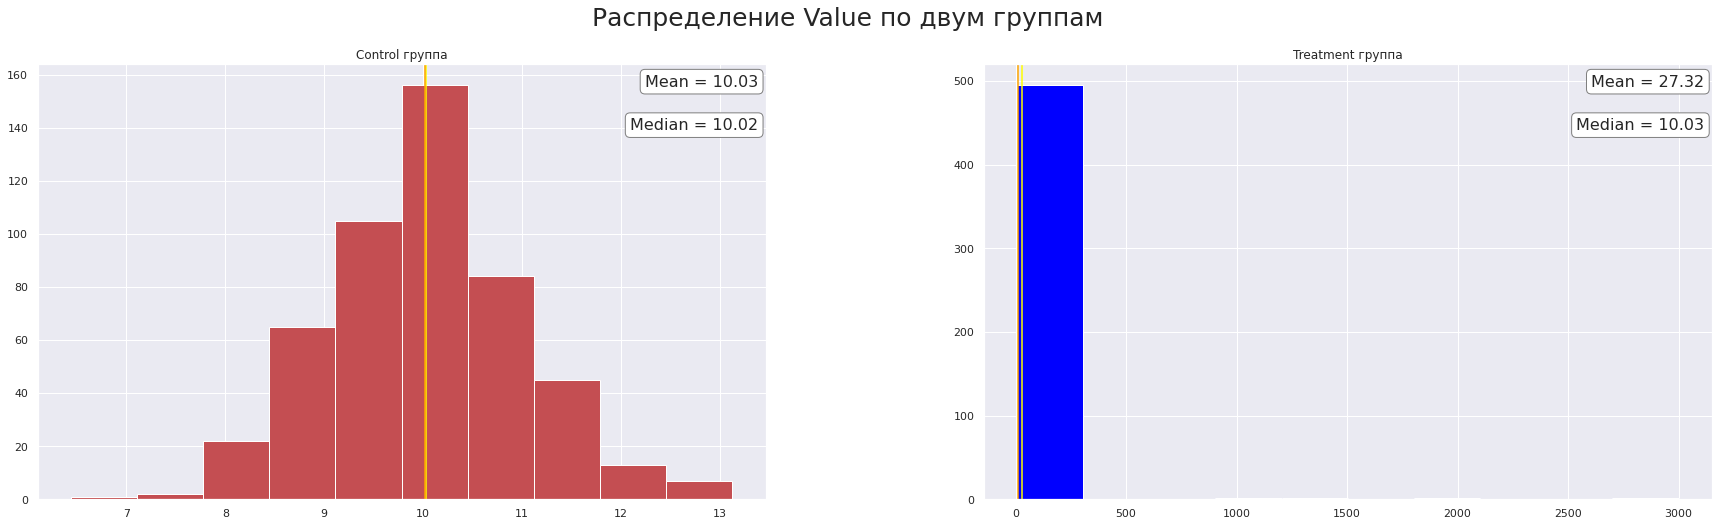

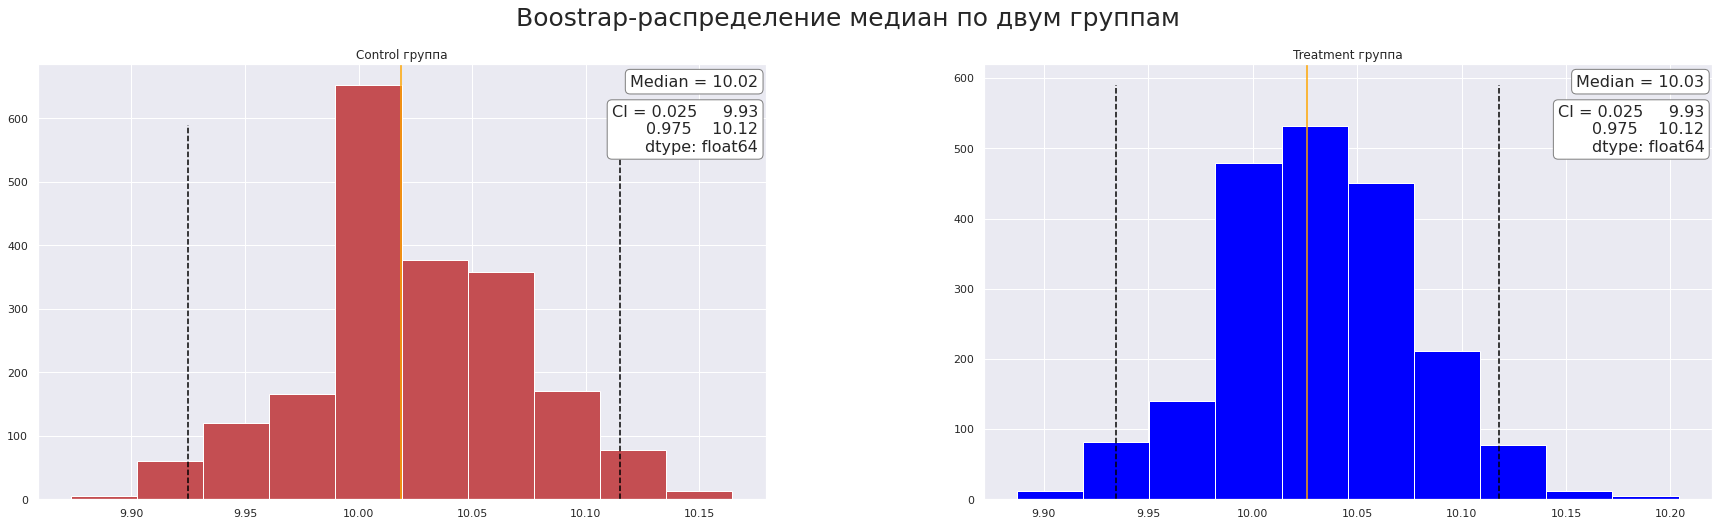

In [23]:
#Используем функцию для визуализации
graph(data_new_control, data_new_treatment, 'value')
graph(control_boot_median, treatment_boot_median, 'median')

**Интепретация**:
С медианами все лучше, поскольку они не чувствительны к выбросам!

---
### Проверим гипотезу о средних для boostrap выборки

In [38]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50, color = "skyblue")
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

Вызовем функцию!

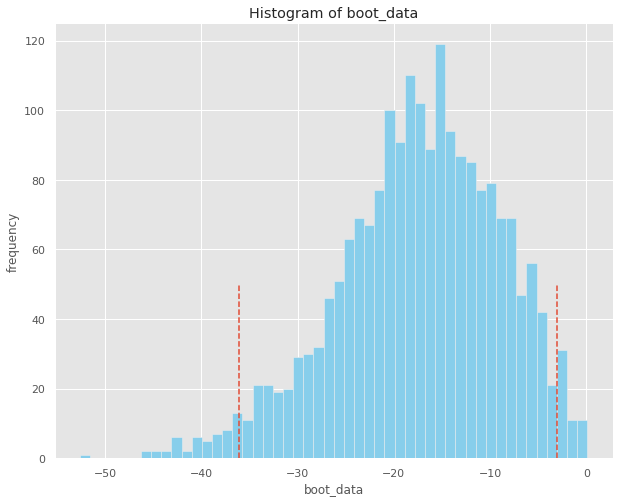

In [39]:
booted_data = get_bootstrap(data_new_control.value, data_new_treatment.value, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

**Интерпретация**:
1. Границы доверительного интервала для среднего не охватывают значение 0.


2. Следовательно, мы можем отвергнуть H0.  


Посмотрим на значение p-value, чтобы удостовериться!

In [40]:
#Расчет p-value 
booted_data["p_value"]

0.03776177042078112

Значение p-value <0.05, мы можем сделать вывод о том, что средние в двух выборках, возможно, различаются. 

---
### Теперь посмотрим, что нам говорит u-test 

In [41]:
mannwhitneyu(data_new_control.value, data_new_treatment.value, alternative = "two-sided")

MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)

По результатам теста распределения обеих выборок не различаются

### Общая интерпертация

У нас следующая ситуация: boostrap сравнение средних показывает значимый результат, а u-test незначимый.
 
Это ок, потому что u-test не чувствителен к выбросам, поскольку ранговый.

А в boostrap – с большим количеством подвыборок, мы можем больше иметь выборок с выбросами. 

Уверен, что если удалить выбросы, то boostrap тест покажет стат. незначимый результат!

### Проверим гипотезу о средних для boostrap выборки без выбросов 

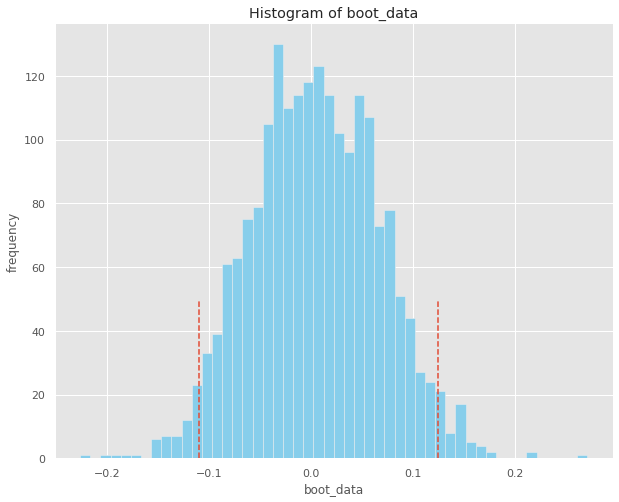

In [43]:
booted_data = get_bootstrap(data_new_control.value, data_new_treatment_no.value, boot_it = 2000)

Визуально очевидно, что мы принимаем нулевую гипотезу!

In [44]:
#Расчет p-value для подтверждения
booted_data["p_value"]

0.9452296547137689

Да, все ок!

---
### Теперь проверим гипотезу о медианах для boostrap выборки

In [45]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50, color = "skyblue")
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

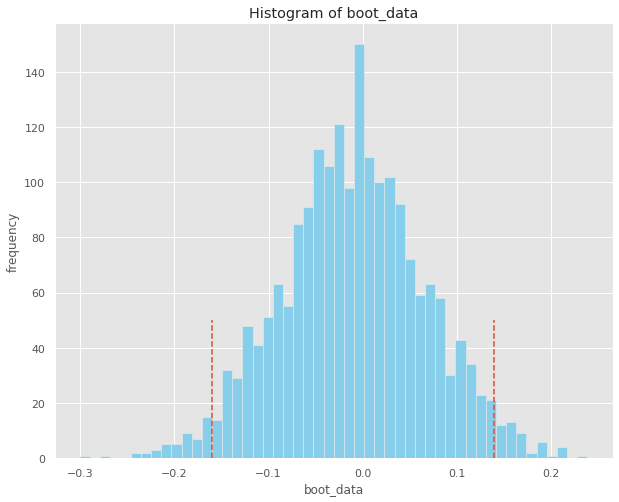

In [46]:
booted_data = get_bootstrap(data_new_control.value, data_new_treatment.value, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

**Интерпретация**:
1. Границы доверительного интервала для медианы охватывают значение 0.


2. Следовательно, мы можем принять H0.  


Посмотрим на значение p-value, чтобы удостовериться!

In [47]:
#Расчет p-value 
booted_data["p_value"]

0.8928005419361061

Здесь все ок, медианы стат. значимо не отличаются!

---
### Выводы:
1. При проверке гипотезы о средних, используя boostrap выборку с выбросами, мы получаем стат. значимый результат, поскольку кол-во подвыборок связано с количеством вхождений выбросов в эти подвыборки


2. U-test демонстрирует стат. незначимый результат, что говорит о том, что распределения для двух групп не отличаются.   
Этот тест не чувствителен к выбросам, поэтому его p-value оказался стат. незначимым.


3. При проверки гипотезы о медианах, используя boostrap выборку с выбросами, мы получаем стат. незначимый результат, поскольку медианы не чувствительны к выбросам. 

### Итого: 

- При отсутствии выбросов экспериментальная и контрольная выборка не отличаются (для средних).   
- Лучше воспользоваться boostrap сравнением медиан или u-test, с целью не допустить повышение ошибки первого рода
